# MLP

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

import matplotlib.pyplot as plt


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

In [3]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [4]:
train_labels[0]

1

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Model

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2,
                    shuffle = True,
                    verbose = 2)

Epoch 1/10
40/40 - 1s - loss: 0.4608 - accuracy: 0.8199 - val_loss: 0.4105 - val_accuracy: 0.8246
Epoch 2/10
40/40 - 0s - loss: 0.2788 - accuracy: 0.9093 - val_loss: 0.2989 - val_accuracy: 0.8870
Epoch 3/10
40/40 - 0s - loss: 0.2154 - accuracy: 0.9288 - val_loss: 0.2711 - val_accuracy: 0.8918
Epoch 4/10
40/40 - 0s - loss: 0.1795 - accuracy: 0.9383 - val_loss: 0.2731 - val_accuracy: 0.8934
Epoch 5/10
40/40 - 0s - loss: 0.1526 - accuracy: 0.9490 - val_loss: 0.2769 - val_accuracy: 0.8924
Epoch 6/10
40/40 - 0s - loss: 0.1329 - accuracy: 0.9569 - val_loss: 0.3030 - val_accuracy: 0.8842
Epoch 7/10
40/40 - 0s - loss: 0.1193 - accuracy: 0.9608 - val_loss: 0.2993 - val_accuracy: 0.8876
Epoch 8/10
40/40 - 0s - loss: 0.1041 - accuracy: 0.9656 - val_loss: 0.3399 - val_accuracy: 0.8800
Epoch 9/10
40/40 - 0s - loss: 0.0942 - accuracy: 0.9697 - val_loss: 0.3576 - val_accuracy: 0.8784
Epoch 10/10
40/40 - 0s - loss: 0.0833 - accuracy: 0.9747 - val_loss: 0.3582 - val_accuracy: 0.8780


In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 320,065
Trainable params: 320,065
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

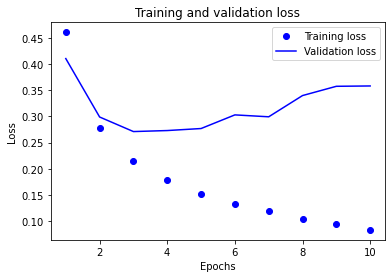

In [13]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [14]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.39496392011642456
Test accuracy: 0.8644400238990784
